# Section 1 : Business Understanding

AirBnB has made the listing of its rental properties in and around Boston, MA neighborhoods public, along with the reviews left by guests, and the dates when properties were available. In this blog, we will review this data to learn about the neighborhood and attempt to understand which types of properties are available, their prices, the concentration of these listings, the number of reviews and lastly, how guests described the properties after their stay.

## Questions  
We analyze the listings and the reviewers datasets in an attempt to answer the following questions:  
### Listings  
What type of properties are available, does the host rent a room or the whole property, the number of properties available in a neighborhood and how rental prices are compared among the neighborhood.  

**Question 1.** Types of properties and room types  
**Question 2.** Proportion of room types in the properties  
**Question 3.** Rental properties in a neighborhood  
**Question 4.** Rental price  
  
### Reviews  
How many reviews are left by the guests, which can subtly tells us the popular neighborhoods among guests. How many guests stayed at multiple properties, who are the guests that left most reviews, and finally the sentiments used in reviews to express the neighborhood.  

**Question 1.** How number of reviews compared among neighborhoods  
**Question 2.** How many reviewers stays at more than one properties  
**Question 3.** Guests leaving the most reviewers  
**Question 4.** Sentiments to describe the neighborhood  

In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import TfidfVectorizer


stop_words = stopwords.words("english")

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston/calendar.csv
/kaggle/input/boston/listings.csv
/kaggle/input/boston/reviews.csv


# Section 2 : Data Understanding

## Gather

In [46]:
listingsdf = pd.read_csv('../input/boston/listings.csv')
calendardf = pd.read_csv('../input/boston/calendar.csv')
reviewsdf  = pd.read_csv('../input/boston/reviews.csv')

## Explore/ Analyze

In [47]:
# shape of the data sets
print('Dataframe shapes:\nListings - {0} \nCalendar - {1} \nReviews  - {2}'.format(listingsdf.shape, calendardf.shape, reviewsdf.shape ))

print('\nnumber of rows\nListings - {0:9,} \nCalendar - {1:9,} \nReviews  - {2:9,}'.format(listingsdf.shape[0], calendardf.shape[0], reviewsdf.shape[0]))

Dataframe shapes:
Listings - (3585, 95) 
Calendar - (1308890, 4) 
Reviews  - (68275, 6)

number of rows
Listings -     3,585 
Calendar - 1,308,890 
Reviews  -    68,275


In [48]:
listingsdf.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [49]:
listingsdf.head()

id  ... reviews_per_month
0  12147973  ...               NaN
1   3075044  ...              1.30
2      6976  ...              0.47
3   1436513  ...              1.00
4   7651065  ...              2.25

[5 rows x 95 columns]

In [50]:
listingsdf['neighbourhood']

0       Roslindale
1       Roslindale
2       Roslindale
3              NaN
4       Roslindale
           ...    
3580    Somerville
3581           NaN
3582           NaN
3583    Somerville
3584    Somerville
Name: neighbourhood, Length: 3585, dtype: object

In [51]:
reviewsdf.head()

listing_id  ...                                           comments
0     1178162  ...  My stay at islam's place was really cool! Good...
1     1178162  ...  Great location for both airport and city - gre...
2     1178162  ...  We really enjoyed our stay at Islams house. Fr...
3     1178162  ...  The room was nice and clean and so were the co...
4     1178162  ...  Great location. Just 5 mins walk from the Airp...

[5 rows x 6 columns]

In [52]:
calendardf.head()

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

In [53]:
listingsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [54]:
reviewsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [55]:
calendardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [56]:
print('REVIEWS: first review date = ' , reviewsdf.date.min(), ' , last review date = ', reviewsdf.date.max())
print('CALENDAR: first date = ' , calendardf.date.min(), ' , last date = ', calendardf.date.max())

REVIEWS: first review date =  2009-03-21  , last review date =  2016-09-06
CALENDAR: first date =  2016-09-06  , last date =  2017-09-05


# Section 3 : Prepare Data

## Analyzing Null Values

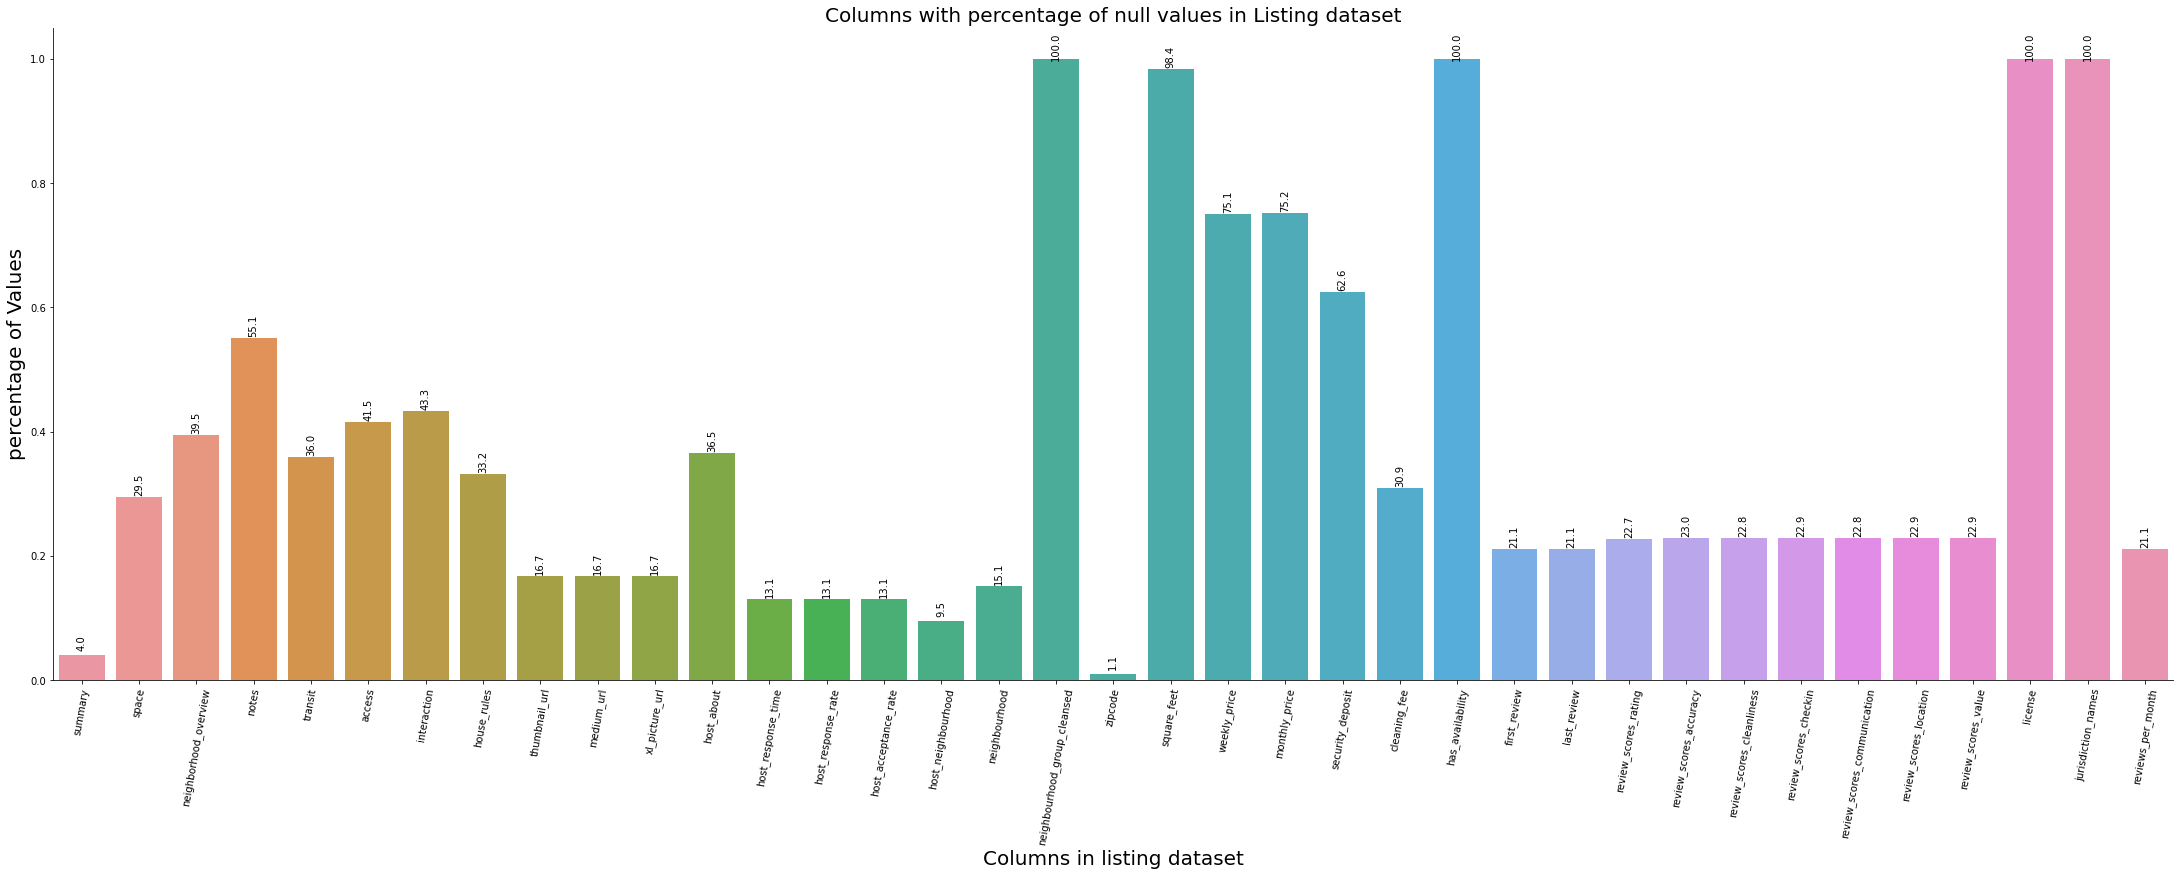

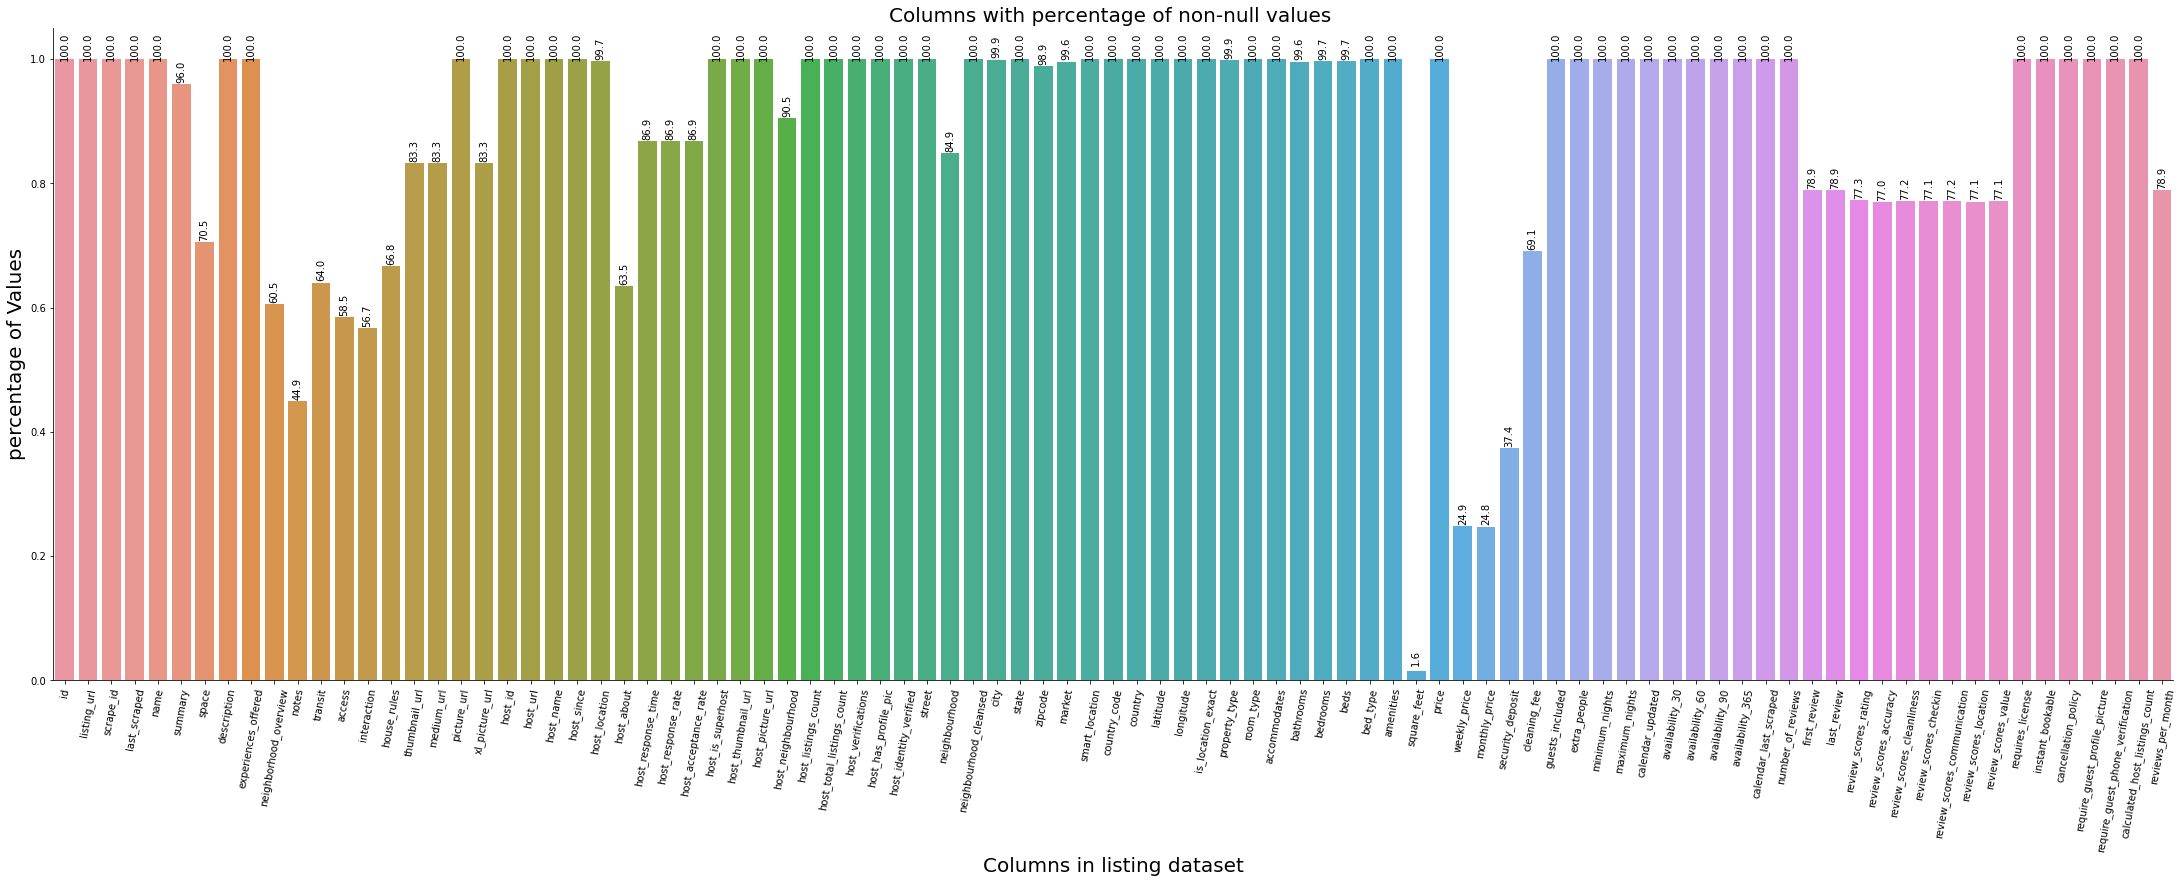

In [57]:
def listingdfValues(df=listingsdf, type='null', cutoff=0.01 ):
    '''
    method to visually see the null and not null columns in the listing dataset, along with columns that are below certain limit (cut-off)
    same method is used for both null columns, as well as the non-null columns. cutoff is applied to not-null columns
    
    PARAMETERS:
    df:     dataframe - default is listingsdf. it could be any variante of the listingsdf as well
    type:   string    - default is 'null'
    cutoff: float     - default is 0.01
    
    RETURN:
    n/a
    '''
    
    # when type parameter is null, filter columns that are null, otherwise filter not-null columns and assign to 'data' dataframe
    if (type == 'null'):
        data = df.isna().sum().to_frame().reset_index()
    else:
        data = df.notna().sum().to_frame().reset_index()

    print('\n')
    data.rename(columns={0:'count'}, inplace=True)
    data['count_percentage'] = data['count'] / df.shape[0]

    data = data[data['count_percentage'] > cutoff]

    plt.figure(figsize=(38,12))
    plt.xticks(rotation=80)
    if (type == 'null') :      
        plt.title('Columns with percentage of null values in Listing dataset', fontsize=20 )
    else:
        plt.title('Columns with percentage of non-null values ', fontsize=20 )

    ax = sns.barplot(x='index', y='count_percentage', data=data )
    sns.despine()
    ax.set_xlabel('Columns in listing dataset', fontsize=20)
    ax.set_ylabel('percentage of Values', fontsize=20)

#     for container in ax.containers:
#         ax.bar_label(container*100, fmt='%.2f')

    for i in range (data.shape[0]):
        count = data.iloc[i]['count_percentage']

        # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
        plt.text(i, count + 0.02 , '{:0.1f}'.format(count*100), ha = 'center', va='center', rotation=90)

listingdfValues(listingsdf, 'null', 0.01)
listingdfValues(listingsdf, 'notnull', 0.0)

## Cleaning Price column

In [58]:
# price column has $ sign and comma, create a new column by
listingsdf['price_cleansed'] = listingsdf.price.replace({'[\$,]':''}, regex=True).astype(float)

### Outlier Prices

In [59]:
def outlier_prices(df=listingsdf, cutoff=500):
    '''
    method to find the outlier prices, and displaying result where prices occurrence exceeds 1
    
    PARAMETERS:
    df:     dataframe - default is listingsdf, any variant of listingsdf can also be passed
    cutoff: string    - default is 500, filter out prices exceeding cut-off and display if their occurrence exceeds 1
    
    RETURN:
    n/a
    '''
    data = df[df['price_cleansed']>cutoff].groupby('price_cleansed')['id'].count().to_frame()
    
    # display the prices that has more than a single occurrence in resulting data set
    display("prices with cutoff of " + str(cutoff) +  " ", data[data['id']>1].T)

outlier_prices(listingsdf, 500)
outlier_prices(listingsdf, 600)
outlier_prices(listingsdf, 700)

'prices with cutoff of 500 '

price_cleansed  506.0   525.0   550.0   600.0   ...  700.0   750.0   1000.0  1250.0
id                   2       2       6      11  ...       4       2       2       2

[1 rows x 11 columns]

'prices with cutoff of 600 '

price_cleansed  603.0   650.0   699.0   700.0   750.0   1000.0  1250.0
id                   4       3       2       4       2       2       2

'prices with cutoff of 700 '

price_cleansed  750.0   1000.0  1250.0
id                   2       2       2

### Create reviews_neighborhood Dataframe

merge listingsdf and reviewsdf, and capture neighbourhood_cleansed columns from reviews into the newly created dataset

In [60]:
reviews_neighborhood_df = reviewsdf.merge(listingsdf['neighbourhood_cleansed'], how='left', left_on=reviewsdf['listing_id'], right_on=listingsdf['id'] )

# Section 4 : Evaluation

## Four questions on listings dataset followed by 4 questions on reviews dataset

## Question 1 : Type of Properties and Room Types

### **Q1 Visualize**

0                1     2   ...     10         11     12
property_type  Apartment  Bed & Breakfast  Boat  ...  Other  Townhouse  Villa
count               2612               41    12  ...     17         54      6
percent            72.92             1.14  0.34  ...   0.47       1.51   0.17

[3 rows x 13 columns]

0             1            2
room_type  Entire home/apt  Private room  Shared room
count                 2127          1378           80
percent              59.33         38.44         2.23

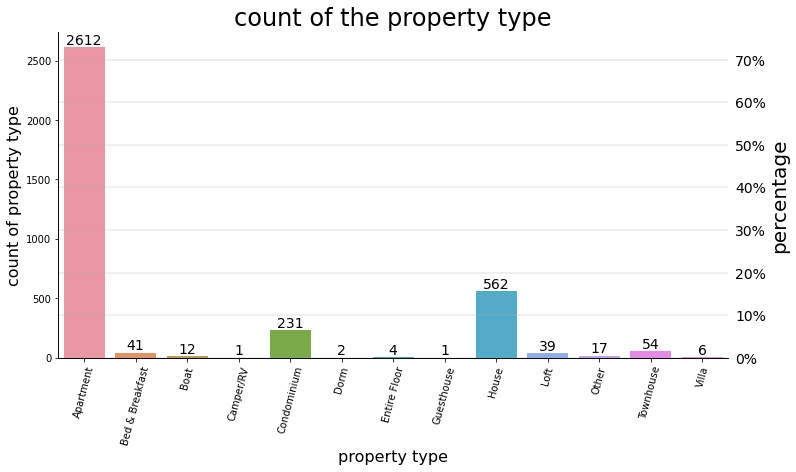

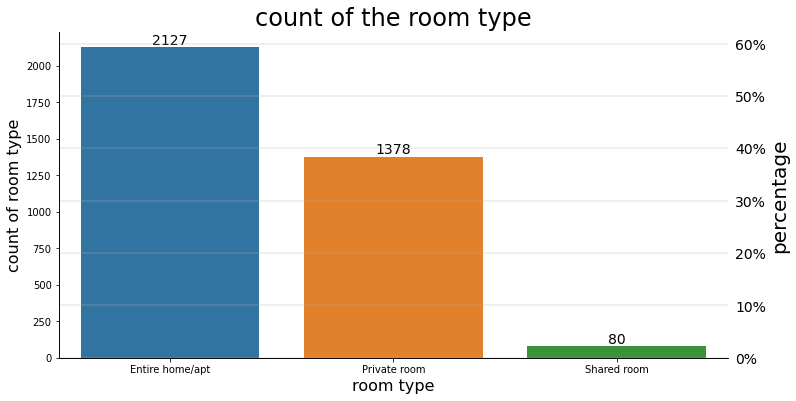

In [61]:
def propertyTypes(df=listingsdf, byType='property_type'):
    '''
    create a visualization of the property types or room types, and also output the data in the form of a table
    
    PARAMETERS:
    df:     Dataframe - default is listingsdf, method is specific to listingdf, however, allowing it to pass as a parameter pemit us to use a modified listingsdf
    byType: string    - default is 'property_type', allows to use the same method for producing for both property_type as well as the room_type
    
    RETURNS:
    N/A
    '''
    
    if (byType == 'property_type'):
        rotation = 75
    else:
        rotation = 0
    
    data = listingsdf 
    data = data.groupby(byType)['id'].count().reset_index()
    total = data['id'].sum()
    data['percent'] = (data['id']/total * 100).round(2)

    plt.figure(figsize=(12,6))
    
    ax = sns.barplot(x=byType, y='id', data=data)
    
    
    byTypeText = byType.replace("_"," ")
    plt.xticks(rotation=rotation)
    plt.title('count of the ' + byTypeText, fontsize=24)
    ax.set_xlabel(byTypeText, fontsize=16)
    ax.set_ylabel('count of ' + byTypeText, fontsize=16)
#     ax.grid(axis='y', linewidth=.4)

    for container in ax.containers:
        ax.bar_label(container, fontsize=14) #, fmt='%.2f')
        
    ax2=ax.twinx()
    
    ax = sns.barplot(x=byType, y='percent', data=data)
    
    ax.set_ylabel('percentage', fontsize=20)
    ax.grid(which='both', axis='y', linewidth=0.4)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    

#     ax.figure.legend()
    plt.yticks(fontsize=14)
    ax.tick_params(right=False)
    sns.despine()
    
    display(data.rename(columns={'id':'count'}).T)

propertyTypes(listingsdf, 'property_type')
propertyTypes(listingsdf, 'room_type')

### **Q1 Explanation**

Properties range from apartments, Bed & Breakfast, Condos, Townhouses, and even houses. The most by far are the apartment listings (almost 73%), followed by houses (~16% ) and condos (~6%) for a total of 95% of the 3,582 listings. That leaves 177, or 5% of 3,582, of other property types.

Shared rooms are also an option, but only 80 listings are offered. Other options are either the full apartment/house or a private room.

## Question 2 : Proportion of room types in the properties

### **Q2. Visualize**

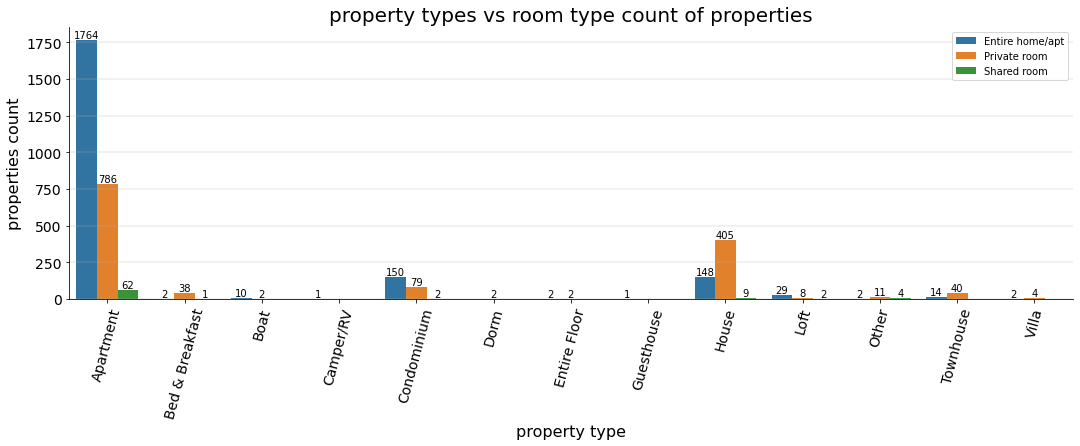

In [62]:
def roomProportion(df=listingsdf):
    '''
    create a visualization of the room types offered to guests, and also output the data in the form of a table
    
    PARAMETERS:
    df:     Dataframe - default is listingsdf, method is specific to listingdf, however, allowing it to pass as a parameter pemit us to use a modified listingsdf
    
    RETURNS:
    N/A
    '''

    data = df 
    type_count = data[['property_type', 'room_type']].value_counts().reset_index().sort_values(['property_type','room_type'])

    # ax = plt.subplot()
    plt.figure(figsize=(18,5))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax = sns.barplot(x='property_type', y=0, hue='room_type', data=type_count)
    sns.despine()
    plt.xticks(rotation=75)
    plt.title('property types vs room type count of properties', fontsize=20)
    plt.legend(loc='upper right',fancybox=True)
    ax.set_xlabel('property type', fontsize=16)
    ax.set_ylabel('properties count', fontsize=16)
    ax.grid(axis='y', linewidth=.35)

    for container in ax.containers:
        ax.bar_label(container) #, fmt='%.1f')

# for i in range(type_count.shape[0]):
#     count = type_count.iloc[i][0]
    
#     # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
# #     plt.text(i, count + 0.05 , '{:0.1f}'.format(count), rotation=90, ha = 'center', va='top')
    
#     plt.text(i, count + 0.05 , '{:0.1f}'.format(count), rotation=90, ha = 'center', va='top')

roomProportion(listingsdf)

0            1   ...            67            68
neighbourhood_cleansed    Allston      Allston  ...  West Roxbury  West Roxbury
property_type           Apartment  Condominium  ...     Apartment         House
count                         177            8  ...            15            29
percent                       5.2         0.23  ...          0.44          0.85

[4 rows x 69 columns]

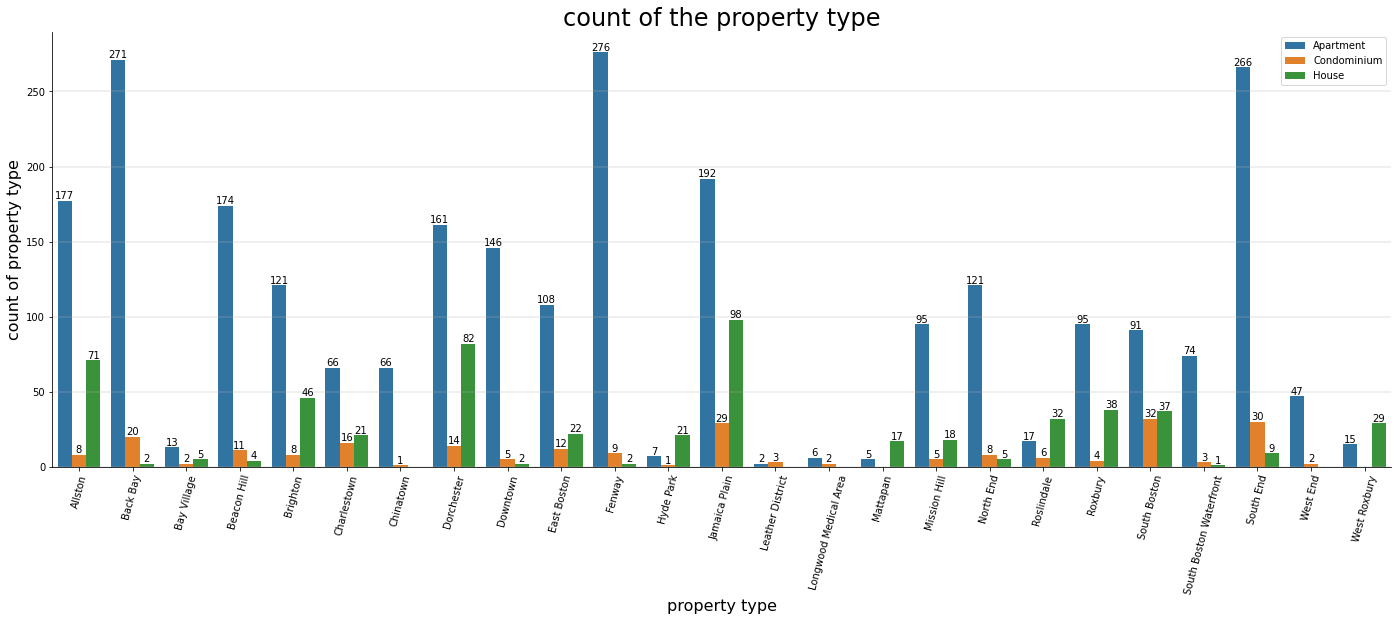

In [63]:
def nhoodPropertyTypes(df=listingsdf, byType='property_type'):
    '''
    visualize and output the data of property types in neighbourhood.
    Same method is used for creating visuals for both property_type as well as room_type
    
    PARAMETERS:
    df:     dataframe - default is listingdf. a variant of listingdf can also be passed, however it needs to have the columns used in thei method.
    byType: string    - default is 'property_type', a constant used to either have a property_type or room_type
    '''
    
    if (byType == 'property_type'):
        rotation = 75
    else:
        rotation = 0
    
    data = listingsdf[listingsdf['property_type'].isin(['Apartment', 'Condominium', 'House']) ]
    data = data.groupby(['neighbourhood_cleansed', 'property_type'])['id'].count().reset_index()
    
    total = data['id'].sum()
    data['percent'] = (data['id']/total * 100).round(2)

    plt.figure(figsize=(24, 8))
    ax = sns.barplot(x='neighbourhood_cleansed', y='id', hue=byType, orient="v", data=data)
    sns.despine()
    
    byType = byType.replace("_"," ")
    plt.xticks(rotation=rotation)
    plt.title('count of the ' + byType, fontsize=24)
    ax.set_xlabel(byType, fontsize=16)
    ax.set_ylabel('count of ' + byType, fontsize=16)
    ax.grid(axis='y', linewidth=.4)
    plt.legend(loc='upper right')

    for container in ax.containers:
        ax.bar_label(container, fontsize=10) #, fmt='%.2f')
        
    display(data.rename(columns={'id':'count'}).T)

nhoodPropertyTypes(listingsdf, 'property_type')
# nhoodPropertyTypes(listingsdf, 'room_type')

### **Q2 Explanation**

Most of the apartment and condo listings offer full apartment/condos as a rental (67.5%) vs houses (26%). While 30% of apartments (31% for condos) offer a private room, it’s at 72% for house rentals. Homeowners renting a private room is indicative of homes having an extra room to offer for rent. Apartment and condos are generally at most up to three bedrooms. Full apartment rental gives a clue that many of such listings are either single or have two bedrooms.


The green bar in the second visualgives a hint that the neighborhood is a suburb of Boston, such as West Roxbury or Hyde Park, where Houses are in greater number than apartments. On other hand, the tall blue bars represent the neighborhoods of Back Bay, Beacon Hill, Downtown, Fenway, Mission Hill, North End, South Boston Waterfront, South End, and West End, which consist mostly of apartment buildings.

## Question 3 : Rental properties in a neighborhood

### **Q3. Visualize**

0         1   ...        23            24
neighborhood   Allston  Back Bay  ...  West End  West Roxbury
count              260       302  ...        49            46
average           7.25      8.42  ...      1.37          1.28
average price   112.31    240.95  ...    209.59        107.11

[4 rows x 25 columns]

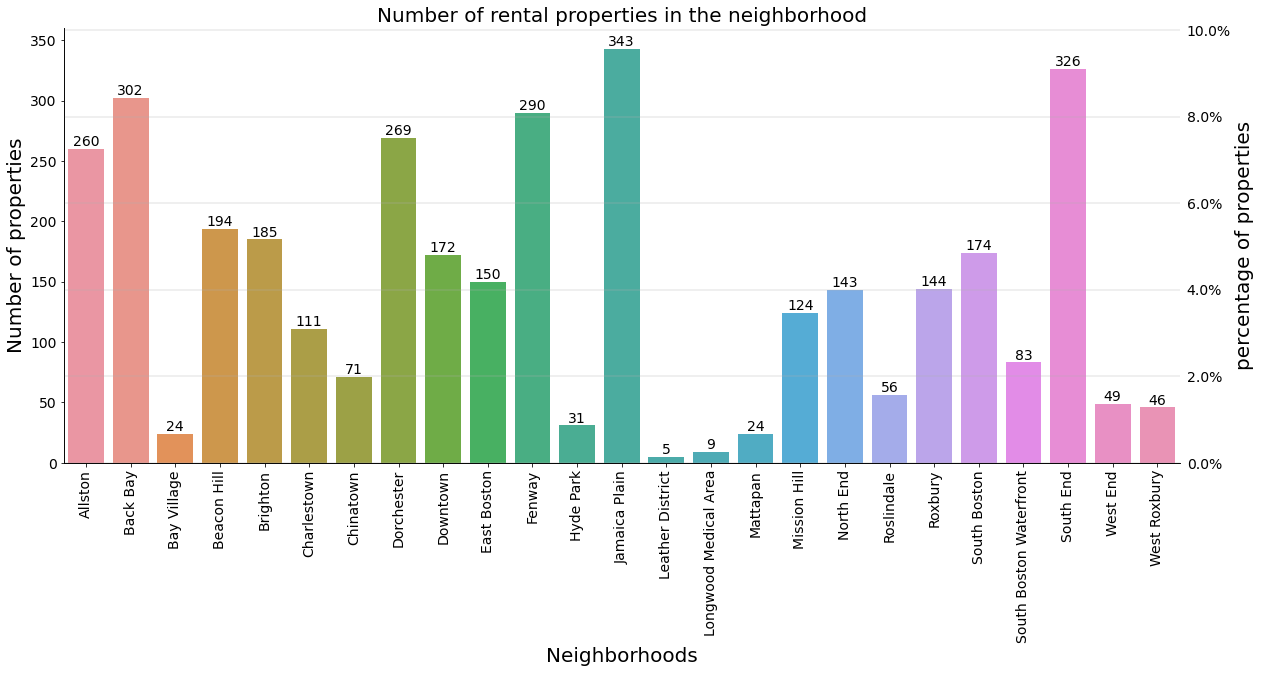

In [64]:
def averagePopertiesNhood(df=listingsdf):
    '''
    accepts the dataframe, default is listingdf. 
    Calculate the mean price for each of the neighborhood
    
    PARAMETERS:
    df: dataframe - default is listingsdf, to use for calculating the average price of the neighbourhood
    '''

    pd.set_option('display.max_columns', 0)

    # average price of properties in the neighborhood
    data2=df.groupby('neighbourhood_cleansed')['price_cleansed'].mean().reset_index()
    # average number of properties in the neighborhood
    data3=df.groupby('neighbourhood_cleansed')['id'].count().reset_index()

    data3['average'] = (data3['id']/listingsdf.shape[0] * 100).round(2)
    data = data3.merge(data2)
    data['price_cleansed'] = data['price_cleansed'].round(2)
    data.rename(columns={'neighbourhood_cleansed': 'neighborhood','price_cleansed':'average price', 'id':'count'}, inplace=True)

    display(data.T)
    
    plt.figure(figsize=(20,8))
    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=14)

    ax = sns.barplot(x='neighborhood', y='count', data=data)
    ax.set_ylabel('Number of properties', fontsize=20)
    ax.set_xlabel('Neighborhoods'       , fontsize=20)

    for container in ax.containers:
        ax.bar_label(container, label_type = 'edge', fontsize=14) #, fmt='%.2f')
#     ax.legend(loc=0)

    ax2=ax.twinx()
    ax = sns.barplot(x='neighborhood', y='average', data=data)
    ax.set_ylabel('percentage of properties', fontsize=20)
    ax.grid(which='both', axis='y', linewidth=0.4)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    

#     ax.figure.legend()
    plt.yticks(fontsize=14)
    ax.tick_params(right=False)
    

    plt.title('Number of rental properties in the neighborhood',fontsize=20)
    sns.despine()
    
averagePopertiesNhood(listingsdf)

### **Q3. Explanation**
A little over half, 13 out of 25 (52%), of the neighborhoods have over 80% of total listed rentals, i.e., 2,952 out 3,585 properties. This include the neighborhoods of Jamaica Plain, South End, Back Bay, Fenway, Dorchester, Allston, Beacon Hill, Brighton, South Boston, Downtown, East Boston, Roxbury and North End.

The remaining half, 48%, has 776 out of 3,585 properties. The 12 out of 25 (48%) of the neighborhoods contains 20% of the listed rentals. The neigborhoods include Mission Hill, Charlestown, South Boston Waterfront, Chinatown, Roslindale, West End, West Roxbury, Hyde Park, Bay Village, Mattapan, Longwood Medical Area, and Leather District.

## Question 4 : Rental prices

### **Q4. Visualize**

## Average Price in the neighborhood

0         1   ...        23            24
neighborhood   Allston  Back Bay  ...  West End  West Roxbury
average price   112.31    232.04  ...    209.59        107.11

[2 rows x 25 columns]

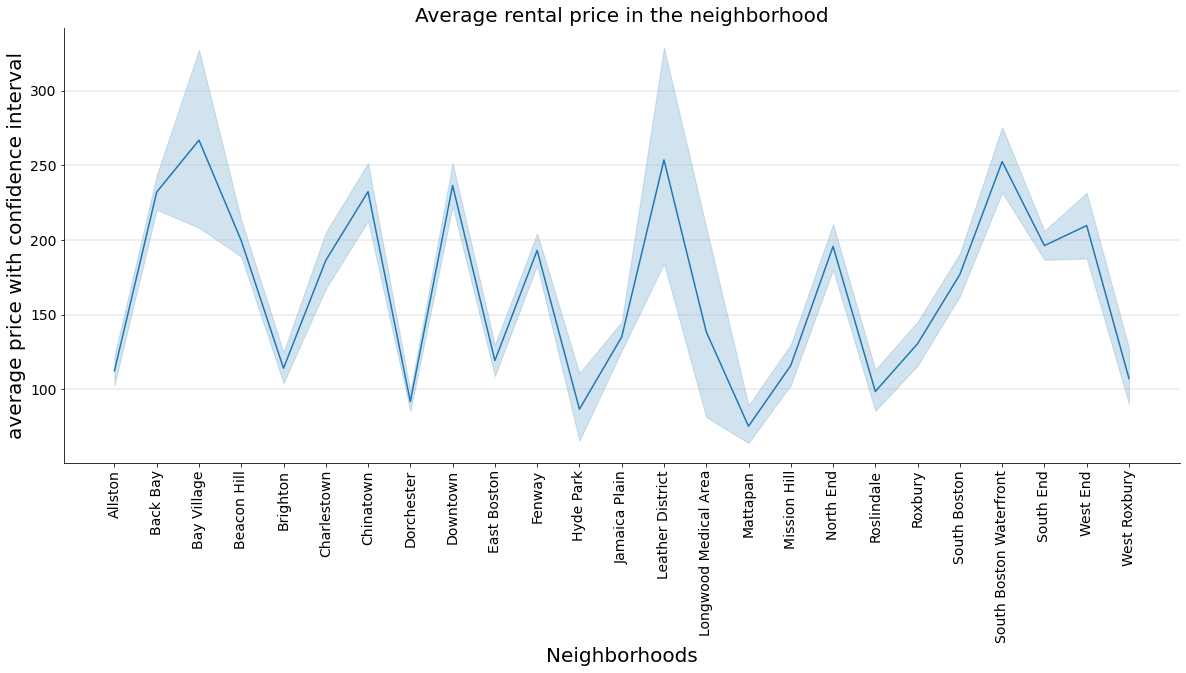

In [65]:
def averagePriceNhood(df=listingsdf, cutoff=500):
    '''
    accepts the dataframe, default is listingdf. 
    Calculate the mean price for each of the neighborhood
    cutoff is introduced to remove the outliers exceeding the passed parameter value
    
    PARAMETERS:
    df:     dataframe - default listingsdf, to use for calculating the average price of the neighbourhood
    cutoff: string    - default 500, cutoff to include the prices that are upto cut-off
    '''

    pd.set_option('display.max_columns', 0)
    
    df = df[df['price_cleansed'] <= cutoff]

    # data = listingsdf.groupby(['neighbourhood_cleansed','price_cleansed'])['city'].count().reset_index()
    data = df.sort_values('neighbourhood_cleansed') #.groupby(['neighbourhood_cleansed'])['price_cleansed'].mean().reset_index()

    data2 = data.groupby('neighbourhood_cleansed')
    # fig, ax = plt.subplots()
    plt.figure(figsize=(20,8))
    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=14)

#     ax = sns.countplot(x='neighbourhood_cleansed',  data=data)
#     ax.set_ylabel('Number of properties', fontsize=20)
#     ax.set_xlabel('Neighborhoods'       , fontsize=20)
#     for container in ax.containers:
#         ax.bar_label(container, label_type = 'edge', fontsize=14) #, fmt='%.2f')
#     ax.legend(loc=0)

#     ax2=ax.twinx()
    ax = sns.lineplot(x='neighbourhood_cleansed', y='price_cleansed',       data=data)
    ax.set_xlabel('Neighborhoods'       , fontsize=20)
    ax.set_ylabel('average price with confidence interval', fontsize=20)
    
    ax.grid(axis='y', linewidth=0.4)
#     ax.figure.legend()
    plt.yticks(fontsize=14)
    sns.despine()
    

    plt.title('Average rental price in the neighborhood',fontsize=20)

# plt.show()

    display(data.groupby('neighbourhood_cleansed')['price_cleansed'].mean().round(2)
            .to_frame().reset_index().rename(columns={'neighbourhood_cleansed':'neighborhood', 'price_cleansed':'average price'}).T)
    
averagePriceNhood(listingsdf, 600)

In [66]:
listingsdf[listingsdf['neighbourhood_cleansed'] == 'Leather District'] #   ['price_cleansed'].sum() / 56

id  ... price_cleansed
550  6499228  ...          245.0
551  4053612  ...          390.0
552  8733896  ...          159.0
553  9166002  ...          295.0
554  8014683  ...          179.0

[5 rows x 96 columns]

## price range in each neighborhood

In [67]:
def priceRange(df=listingsdf, cutoff=500):
    '''
    accepts the dataframe, default is listingdf. 
    Calculate the mean price for each of the neighborhood
    cutoff is introduced to remove the outliers exceeding the passed parameter value
    
    PARAMETERS:
    df:     dataframe - default listingsdf, to use for calculating the average price of the neighbourhood
    cutoff: string    - default 500, cutoff to include the prices that are upto cut-off
    '''

    df = df[df['price_cleansed'] <= cutoff]
    data1 = df.groupby('neighbourhood_cleansed')['price_cleansed'].min().round(0).to_frame().reset_index()
    data2 = df.groupby('neighbourhood_cleansed')['price_cleansed'].max().round(0).to_frame().reset_index()
    data3 = df.groupby('neighbourhood_cleansed')['price_cleansed'].mean().round(2).to_frame().reset_index()
    data1.rename(columns={'price_cleansed':'min price'}, inplace=True)
    data2.rename(columns={'price_cleansed':'max price'}, inplace=True)
    data3.rename(columns={'price_cleansed':'avg price'}, inplace=True)

    data = data1.merge(data2.merge(data3))
    data.rename(columns={'neighbourhood_cleansed':'neighborhood'}, inplace=True)
    display(data.T)


priceRange(listingsdf, 600)

0         1            2   ...         22        23            24
neighborhood  Allston  Back Bay  Bay Village  ...  South End  West End  West Roxbury
min price        11.0      40.0         90.0  ...       45.0      60.0          45.0
max price       550.0     600.0        500.0  ...      600.0     450.0         349.0
avg price      112.31    232.04       266.83  ...     196.17    209.59        107.11

[4 rows x 25 columns]

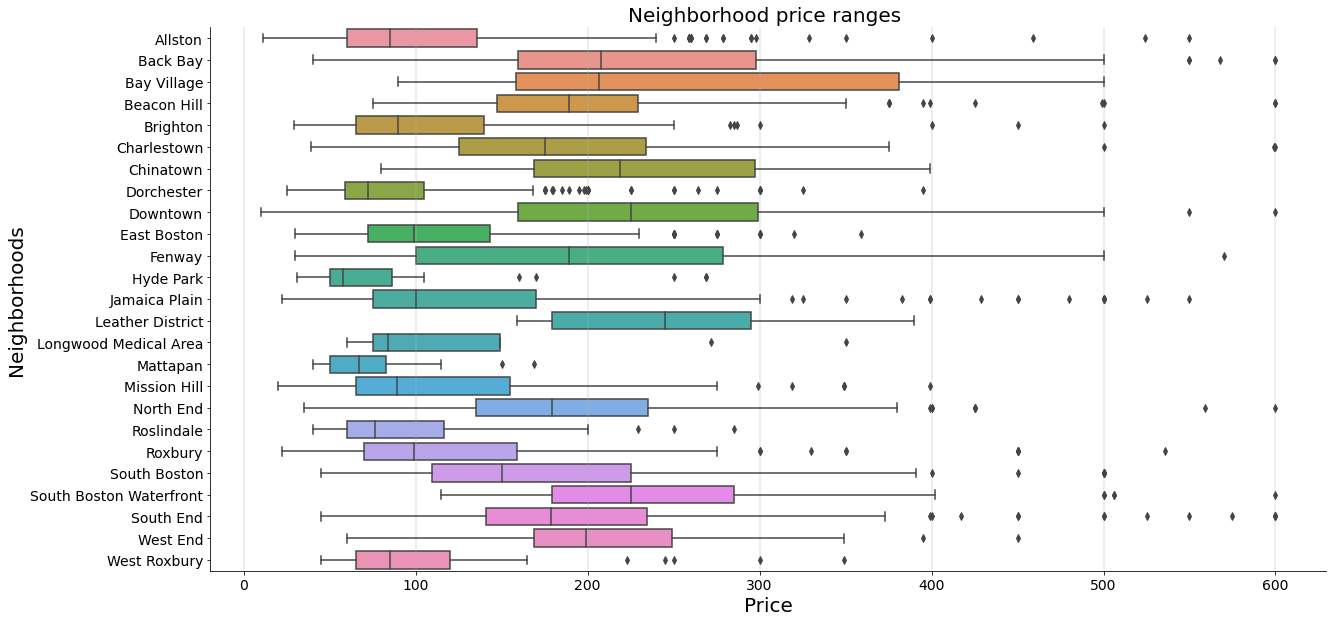

In [68]:
def priceRange(df=listingsdf, cutoff=500):
    '''
    accepts the dataframe, default is listingdf. 
    Calculate the mean price for each of the neighborhood
    cutoff is introduced to remove the outliers exceeding the passed parameter value
    
    PARAMETERS:
    df:     dataframe - default listingsdf, to use for calculating the average price of the neighbourhood
    cutoff: string    - default 500, cutoff to include the prices that are upto cut-off
    '''

    plt.figure(figsize=(20,10))
    data = df[df['price_cleansed'] <= 600].sort_values('neighbourhood_cleansed')
#     data = df.sort_values('neighbourhood_cleansed')

    plt.title('Neighborhood price ranges ', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    sns.despine()
    
    ax = sns.boxplot(y='neighbourhood_cleansed', x='price_cleansed', data=data)
    ax.set_xlabel('Price', fontsize=20)
    ax.set_ylabel('Neighborhoods', fontsize=20)
    ax.grid(axis='x', linewidth=0.45)


priceRange(listingsdf, 600)
# ax = sns.swarmplot(y='neighbourhood', x='price_cleansed', data=d)

### **Q4. Explanation**

The average rental price for these properties sits uniformly between $75 and $260.

There are price outliers present in the listings data as shown in table 5 below. One property with $4,000, and another with $3,000. It could be that those are monthly prices, but we can’t be certain. So, we ignore these and other prices that are above $600.

# Reviewers - Four questions on reviewers dataset

## Question 1 : How number of reviews compared among neighborhoods

### **Q1. Visualize**

## Reviews received by neighborhoods


In [69]:
# reviews_neighborhood_df = reviewsdf.merge(listingsdf['neighbourhood_cleansed'], how='left', left_on=reviewsdf['listing_id'], right_on=listingsdf['id'] )

In [70]:
reviews_neighborhood_df.head()

key_0  ...  neighbourhood_cleansed
0  1178162  ...             East Boston
1  1178162  ...             East Boston
2  1178162  ...             East Boston
3  1178162  ...             East Boston
4  1178162  ...             East Boston

[5 rows x 8 columns]

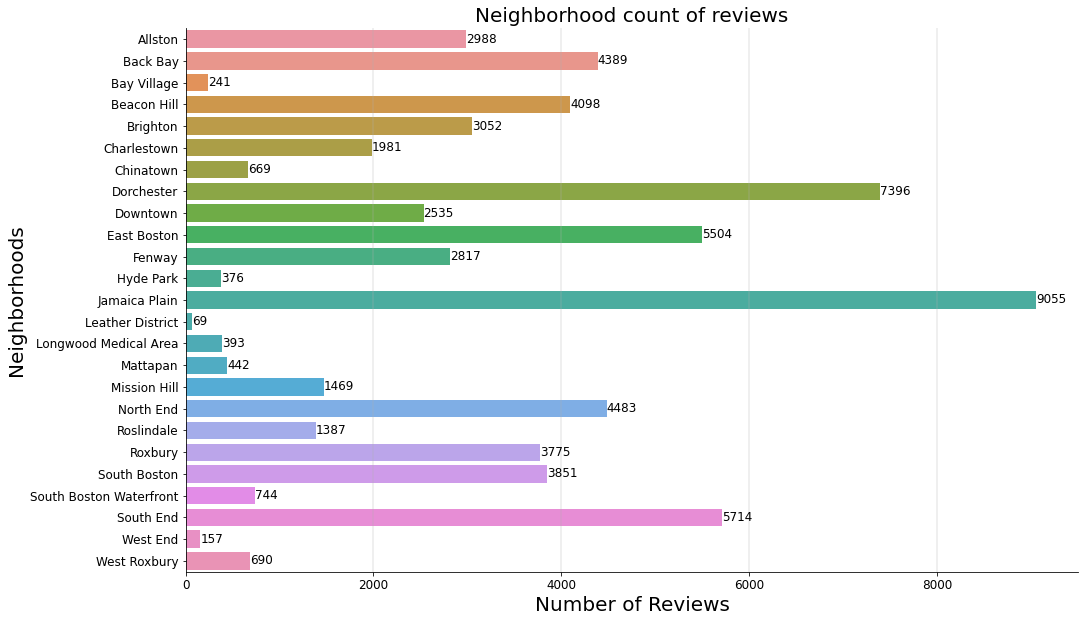

In [71]:
def nhoodReviews(df=reviews_neighborhood_df):
    '''
    number of reviews recieved by the properties and grouped under their respective neighborhood     
    
    PARAMETERS:
    df:     dataframe - default reviews_neighborhood_df, 
    
    RETURN:
    n/a
    '''

    # data = reviews_neighborhood_df.groupby('neighbourhood_cleansed')['reviewer_id'].count()
    plt.figure(figsize=(16,10))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    df.sort_values('neighbourhood_cleansed', inplace=True)
    plt.title('Neighborhood count of reviews', fontsize=20)
    ax = sns.countplot(y='neighbourhood_cleansed' , data=df)
    sns.despine()
    ax.set_xlabel('Number of Reviews', fontsize=20)
    ax.set_ylabel('Neighborhoods', fontsize=20)
    ax.grid(axis='x', linewidth=.4)
    
    for container in ax.containers:
        ax.bar_label(container,fontsize=12) #, fmt='%.2f')
        
    data1 = df.groupby('neighbourhood_cleansed')['id'].count()

nhoodReviews(reviews_neighborhood_df)

In [72]:
data1 = reviews_neighborhood_df.groupby('neighbourhood_cleansed')['id'].count().to_frame()
data2 = reviews_neighborhood_df.groupby('neighbourhood_cleansed')
data1.T

neighbourhood_cleansed  Allston  Back Bay  ...  West End  West Roxbury
id                         2988      4389  ...       157           690

[1 rows x 25 columns]

### **Q1. Explanation**

Jamaica Plain has the most reviews and also has the most properties listed for rental (over 9%).

## Question 2 : How many reviewers stays at more than one properties

### Q2. Visualize

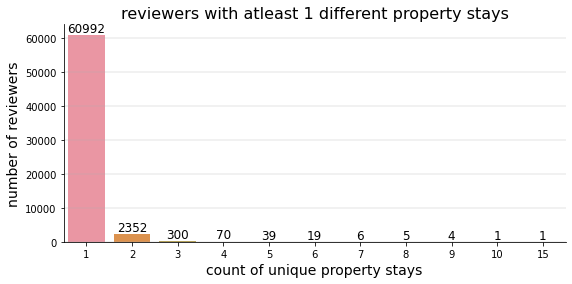

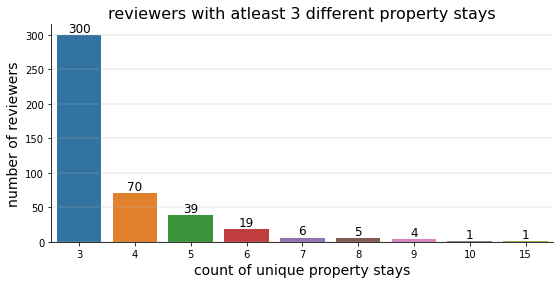

In [73]:
def stayMoreThanOneProperty(df=reviewsdf, min_property_stay=3):
    '''
    find the reviewers that has stayed at more than single property.
    reviewsdf has reviewer-id and the property, where the reviewers had stayed and provided the feedback. Now, it is a case that an individual
    has stayed at the same property multiple times, and has left a review each time.
    Here we want to capture the unique properties that reviewer has stayed at.
    
    PARAMETERS:
    df: dataframe - default is reviewsdf, a variant of reviewsdf can be passed
    min_property_stay: string - default is 3, and it will filter out only the reviewers that has stayed at least by this number of different properties
    
    RETURN:
    n/a
    '''

#     min_property_stay = 

    # group by reviewer and listing-id, to get unique reviewer-id, and listing-id pair
    data  = df.groupby(['reviewer_id','listing_id']).count().reset_index()

    # count the unique listing, reviewer stayed at
    data2 = data.groupby(['reviewer_id'])['listing_id'].count().to_frame().reset_index()

    # filter the result set
    data3 = data2[data2['listing_id'] >= min_property_stay]

    plt.figure(figsize=(9,4))
    plt.title('reviewers with atleast ' + str(min_property_stay) + ' different property stays' , fontsize=16)
    ax = sns.countplot(x='listing_id' , data=data3)
    ax.grid(axis='y', linewidth=.35)

    sns.despine()
    ax.set_xlabel('count of unique property stays', fontsize=14)
    ax.set_ylabel('number of reviewers', fontsize=14)
    for container in ax.containers:
        ax.bar_label(container, fontsize=12) #, fmt='%.2f')

stayMoreThanOneProperty(reviewsdf, 1)
print('\n')
stayMoreThanOneProperty(reviewsdf, 3)

### **Q2. Explanation**

In analyzing the reviews dataset, we find that (Fig. 10) there is a good majority of 300 individuals who stayed at three different properties and have left reviews. We also find two guests who stayed at 10 and 15 different properties and have left reviews. Reviewers with a single stay at a property far outweigh the rest, with 60,992 out of 68,275 reviewers. This is followed by reviewers who stayed in at least two different properties, which would be 2,352 out of 68,275.

## Question 3 : How many guests left the most reviews?

### Q3. Visualize

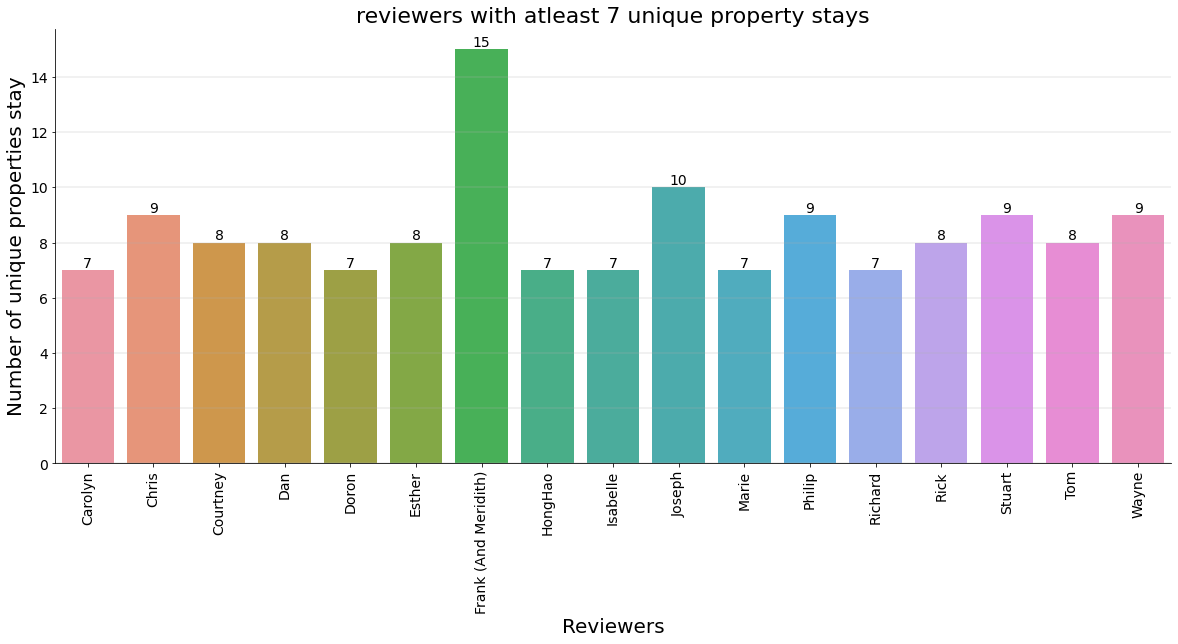

In [74]:
def mostUniquePropertiesReviews(df=reviewsdf, min_properties=7):
    '''
    find the reviewers that has stayed at more than single property.
    reviewsdf has reviewer-id and the property, where the reviewers had stayed and provided the feedback. Now, it is a case that an individual
    has stayed at the same property multiple times, and has left a review each time.
    Here we  capture the invidual guests/reviewers
    
    PARAMETERS:
    df:                dataframe - default is reviewsdf, a variant of reviewsdf can be passed
    min_property_stay: string    - default is 3, and it will filter out only the reviewers that has stayed at least by this number of different properties
    
    RETURN:
    n/a
    '''    
    
    min_reviews = 7
    # group by reviewer and listing-id, to get unique reviewer-id, and listing-id pair
    data  = df.groupby(['reviewer_id','listing_id']).count().reset_index()

    data2 = data.groupby(['reviewer_id'])['listing_id'].count().to_frame().reset_index()
    data2 = data2.merge(reviewsdf['reviewer_name'], how='left', left_on=data2['reviewer_id'], right_on=reviewsdf['reviewer_id'])
    data3 = data2[data2['listing_id'] >= min_reviews].sort_values('reviewer_name')

    plt.figure(figsize=(20,8))
    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=14)
    
    plt.title('reviewers with atleast ' + str(min_reviews) + ' unique property stays', fontsize=22)
    
    ax = sns.barplot(x='reviewer_name', y='listing_id', data=data3)
    ax.set_xlabel('Reviewers', fontsize=20)
    ax.set_ylabel('Number of unique properties stay', fontsize=20)
    ax.grid(axis='y', linewidth='0.35')
    sns.despine()
    for container in ax.containers:
        ax.bar_label(container, fontsize=14) #, fmt='%.2f')

mostUniquePropertiesReviews(reviewsdf, 7)

In [75]:
reviewsdf[reviewsdf['reviewer_id'] == 18607361].sort_values(['listing_id','date'])

listing_id  ...                                           comments
18334       31796  ...  No fuss stay in a great area with very conveni...
51685       57800  ...  Jim let me in the front door on a very cold ni...
51686       57800  ...  Another great stay from a smooth, professional...
51698       57800  ...  Another great stay with Jim. The key system ha...
53511       66288  ...  A clean little room with fridge and stove at h...
20842     1136972  ...  Very nice amenities; snacks, transit, real bre...
55797     1147871  ...  This Airbnb is managed without contact from th...
1258      1321422  ...  Another great stay in snowy Dorchester. Barney...
63762     1332786  ...  Great location in a quiet neighborhood right b...
19548     1472481  ...  Returning to my first AirBnb host, I now have ...
19549     1472481  ...  Yes, I am a regular.  Nice place, good experie...
28098     1544702  ...  Great, as per usual.  I picked up a shirt I le...
25308     3432321  ...  Great place, great location, professionally ma...
16781     3946215  ...  Quick air mattress to crash on near Andrews, j...
65338     3987926  ...  Love this place even more on second stay. May ...
15589     4015972  ...  Susan met me at the train station and made me ...
19746     4568116  ...  Amazing thing they've done with this space.  I...
11237     4909590  ...  Unique space off the b-line. Loved look of the...

[18 rows x 6 columns]

In [76]:
reviews_neighborhood_df = reviewsdf.merge(listingsdf['neighbourhood_cleansed'], how='left', left_on=reviewsdf['listing_id'], right_on=listingsdf['id'] )
reviews_neighborhood_df.head()

key_0  ...  neighbourhood_cleansed
0  1178162  ...             East Boston
1  1178162  ...             East Boston
2  1178162  ...             East Boston
3  1178162  ...             East Boston
4  1178162  ...             East Boston

[5 rows x 8 columns]

In [77]:
# len(data3.reviewer_name.unique())

In [78]:
reviewsdf['reviewer_id'].value_counts()

12096536    37
40651868    25
46024609    22
52667131    21
18607361    18
            ..
46244247     1
81991288     1
10811712     1
27495276     1
90128094     1
Name: reviewer_id, Length: 63789, dtype: int64

In [79]:
neighborhoods = reviews_neighborhood_df['neighbourhood_cleansed'].unique()
neighborhoods

array(['East Boston', 'Dorchester', 'Beacon Hill', 'Fenway', 'Downtown',
       'South End', 'North End', 'Jamaica Plain', 'Chinatown', 'Allston',
       'Back Bay', 'West End', 'Charlestown', 'South Boston', 'Roxbury',
       'Brighton', 'West Roxbury', 'Roslindale',
       'South Boston Waterfront', 'Mattapan', 'Bay Village',
       'Mission Hill', 'Longwood Medical Area', 'Hyde Park',
       'Leather District'], dtype=object)

In [80]:
reviews_neighborhood_df[reviews_neighborhood_df['neighbourhood_cleansed'] == 'Downtown'].shape

(2535, 8)

### **Q3. Explanation**

There were 17 guests who stayed in at least 7 different properties (Fig. 11), with 15 properties being the most rented by a guest, “Frank (and Meredith)”.

## Question 4 : How did the guests describe the neighborhood?

## Q4. Visualize

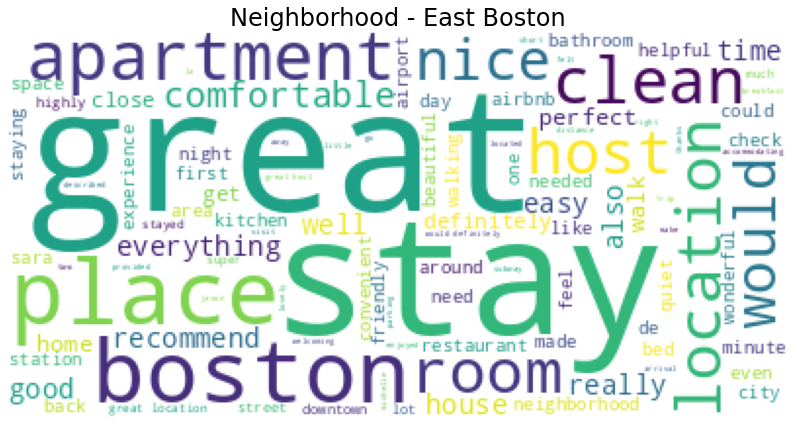

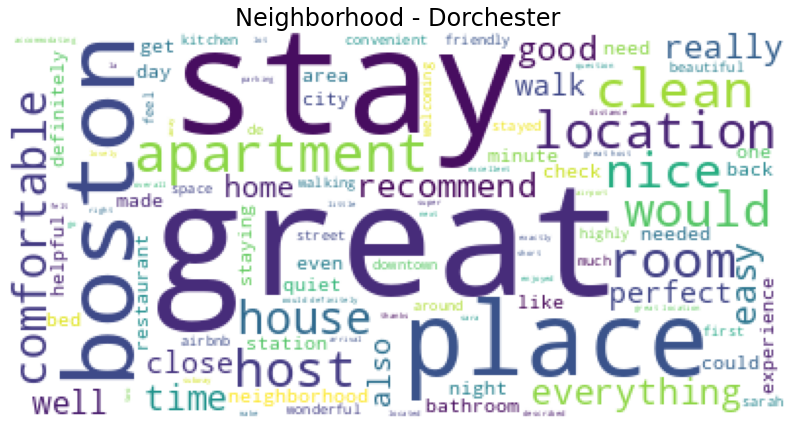

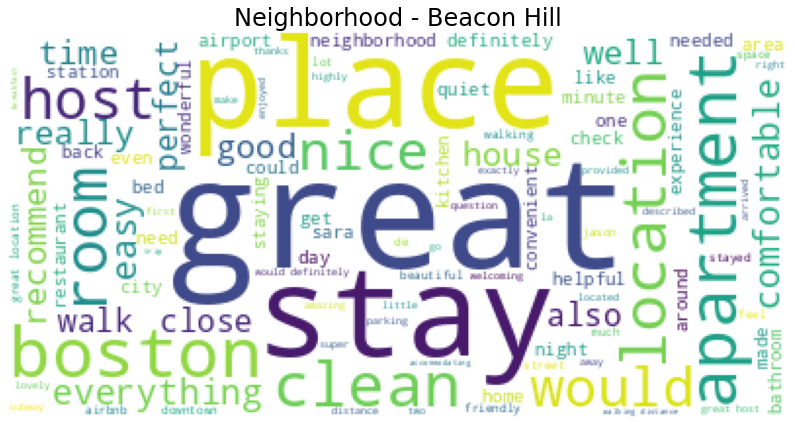

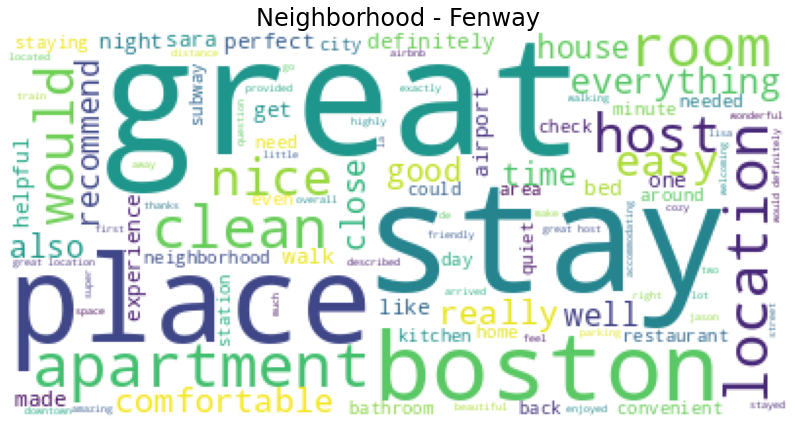

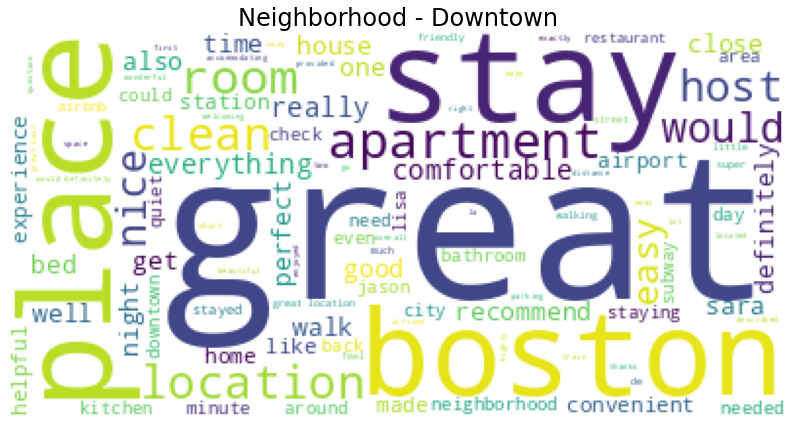

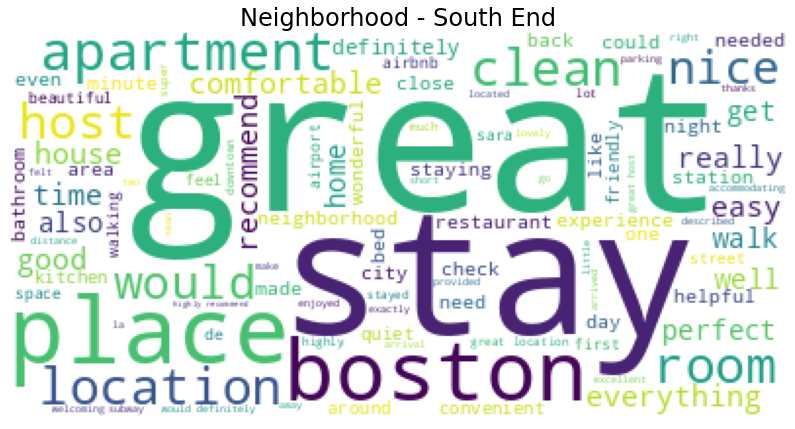

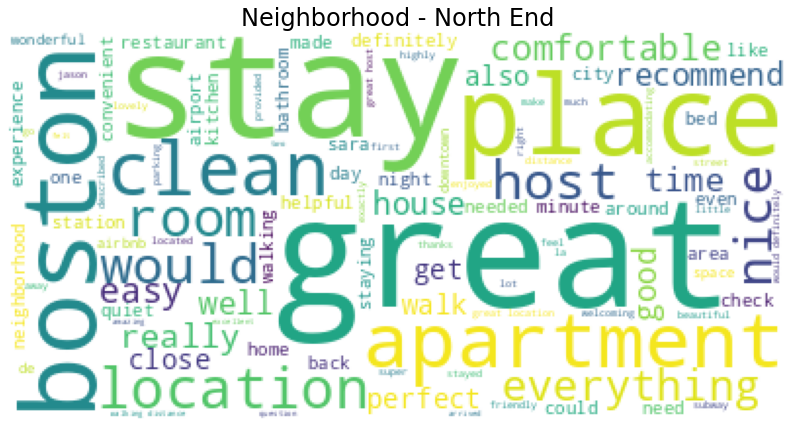

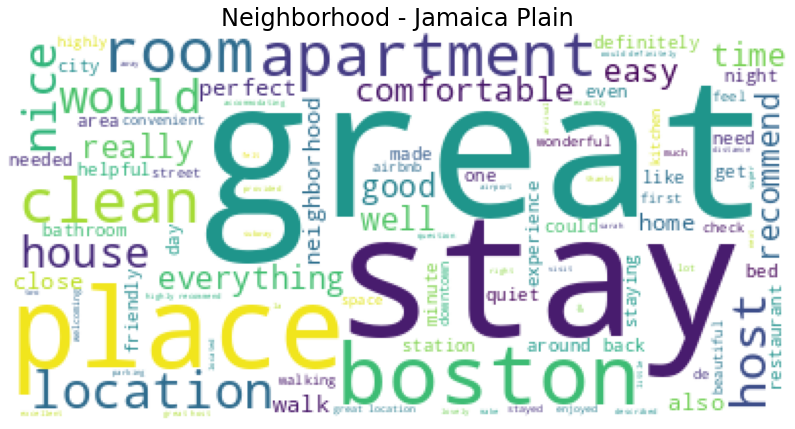

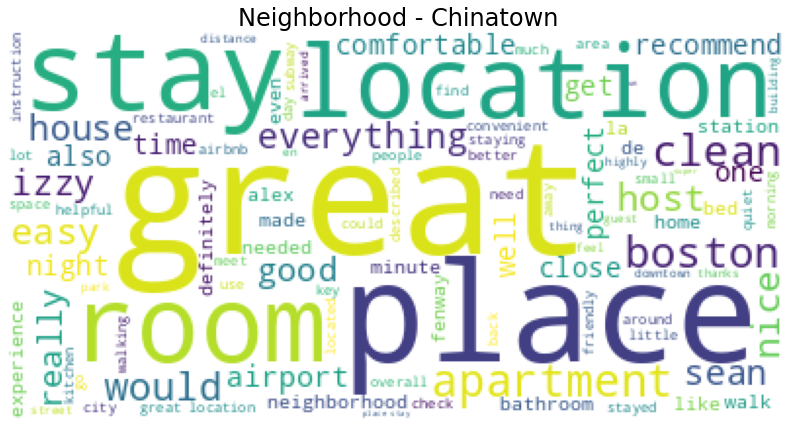

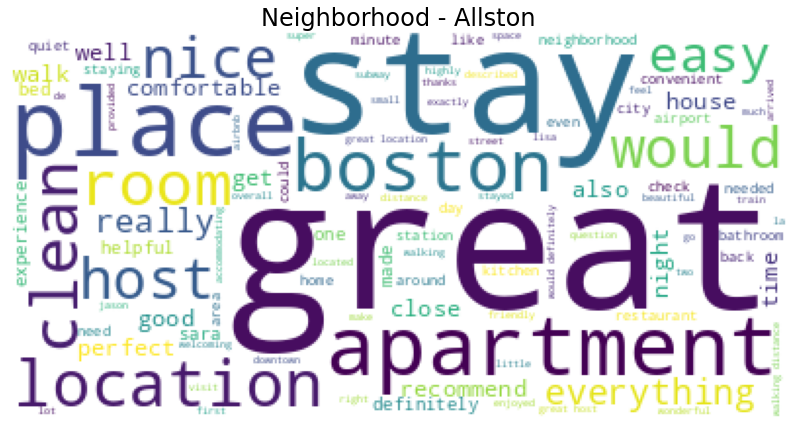

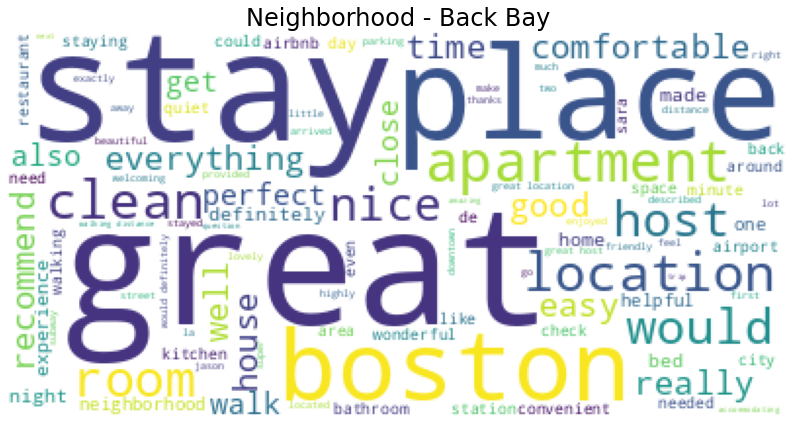

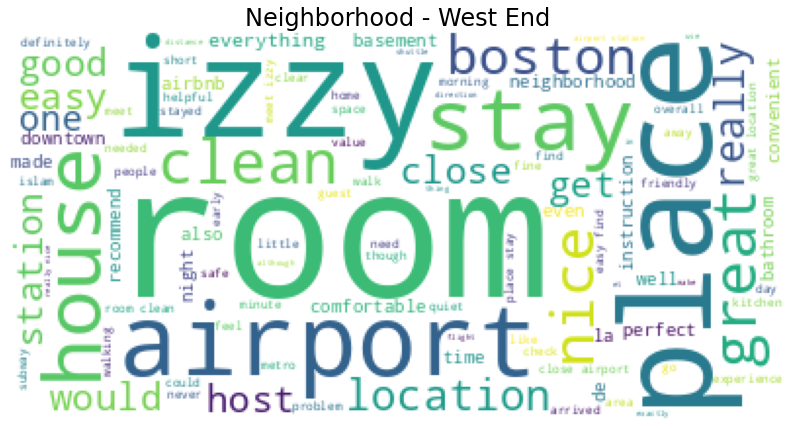

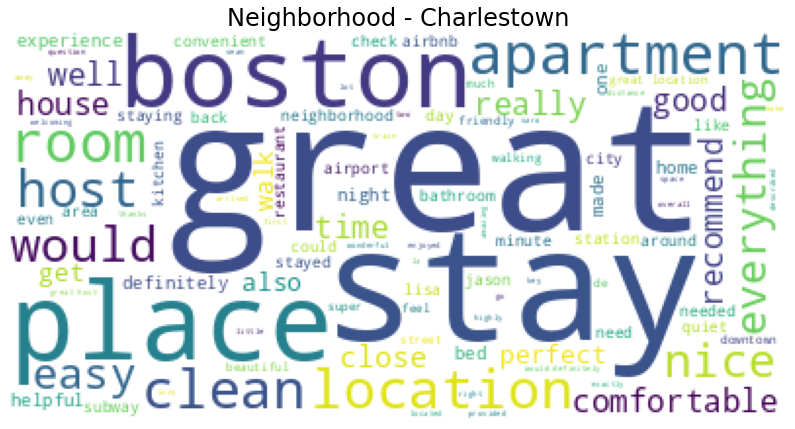

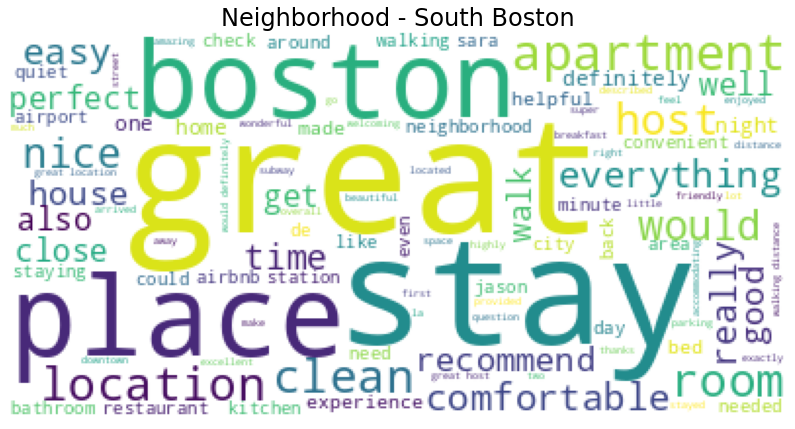

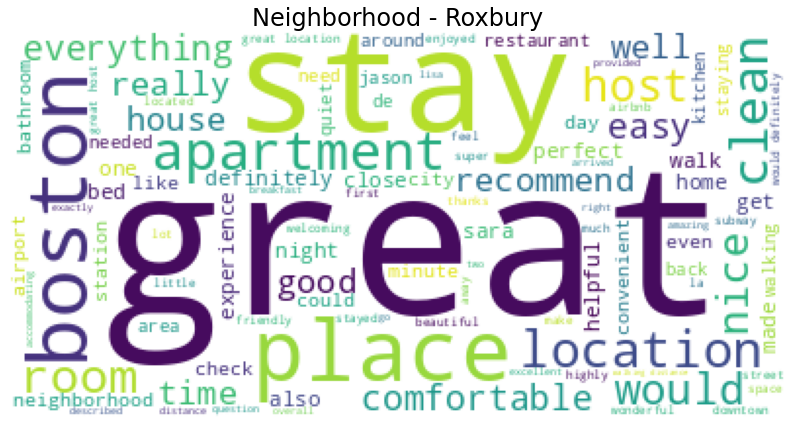

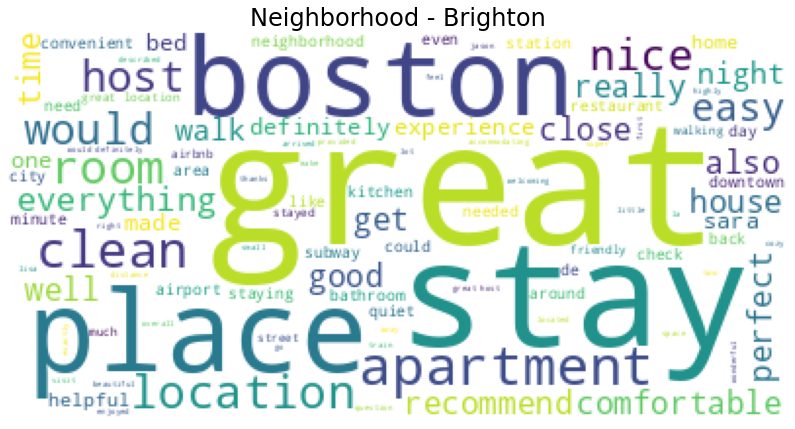

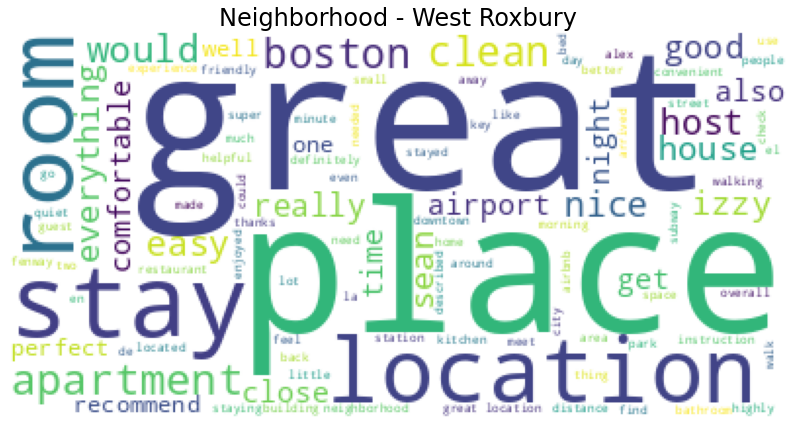

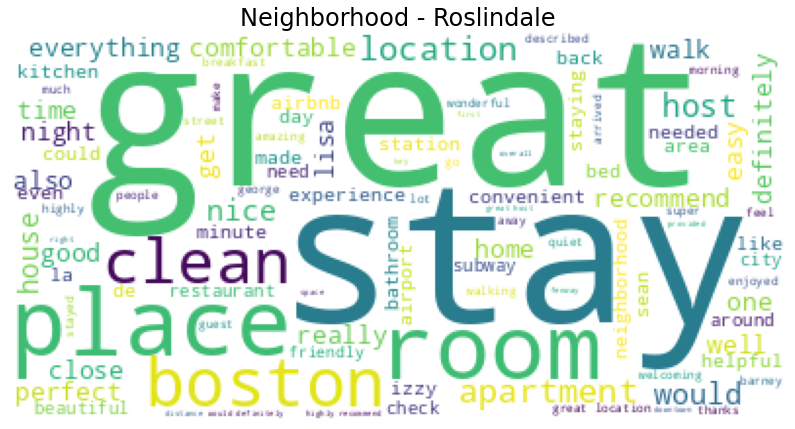

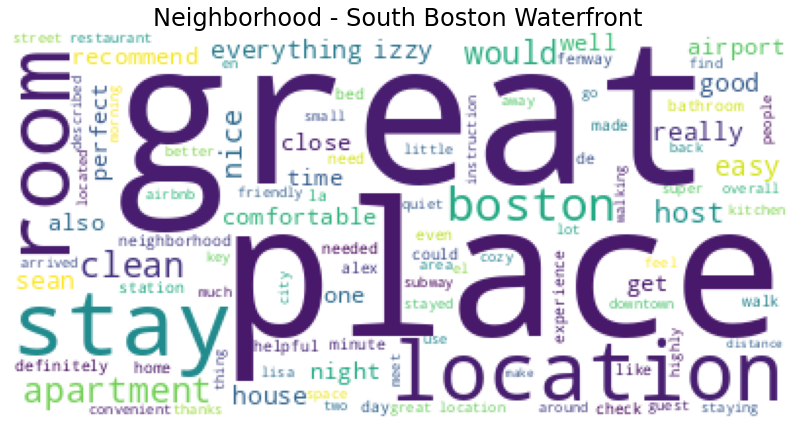

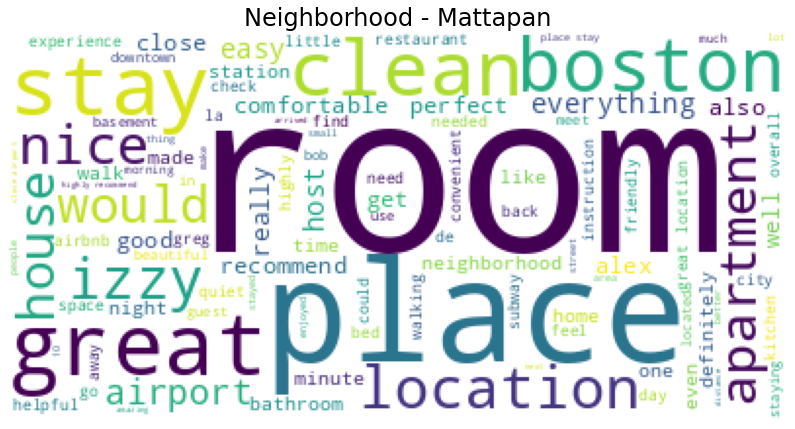

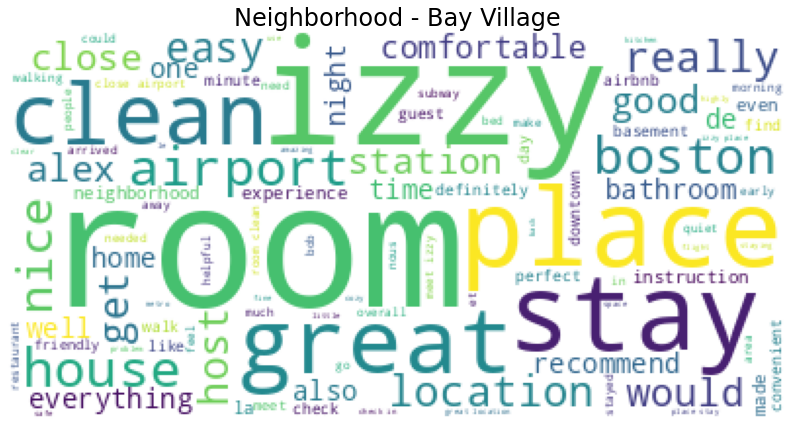

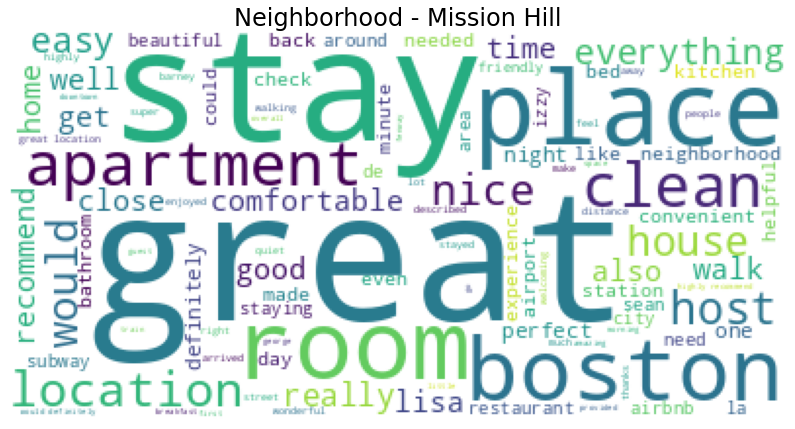

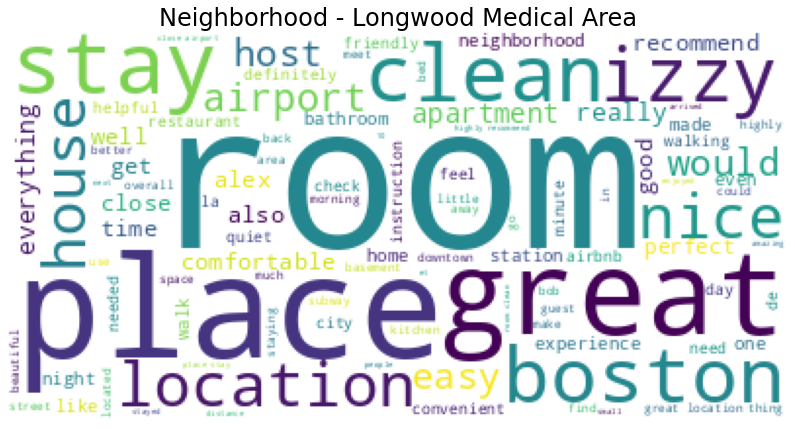

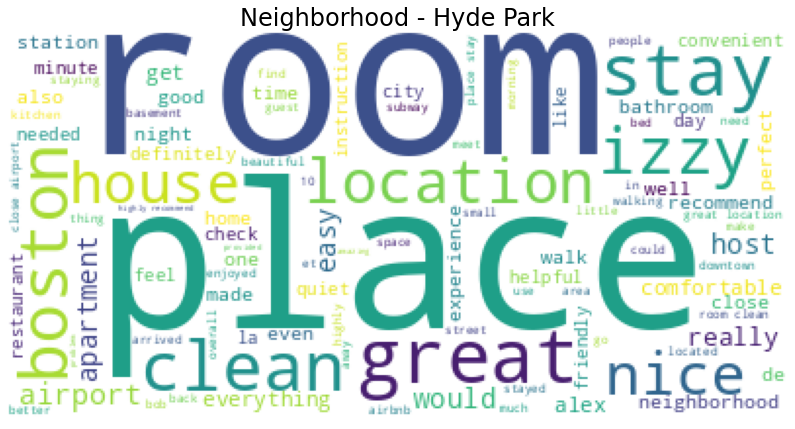

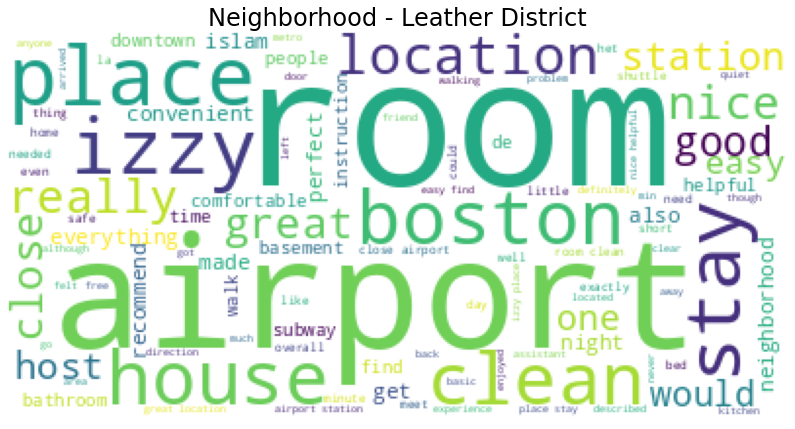

done!


In [81]:
# from tqdm import tqdm
# def review

vectorizer = TfidfVectorizer(ngram_range=(1,2))
lemmatizer = WordNetLemmatizer()
count = 0
for neighborhood in neighborhoods:
    print('\n\n')
    count += 1
    corpus = ''
    nhood = reviews_neighborhood_df[reviews_neighborhood_df['neighbourhood_cleansed'] == neighborhood]
    
#     for rec in tqdm(range(nhood.shape[0])):
    for rec in range(nhood.shape[0]):

    #     list_id  = reviewsdf.listing_id[rec]
        comments = reviewsdf.comments[rec]
        comments   = str(comments).replace('[\$,]',' ' )
        corpus += comments


    words = word_tokenize(corpus)
    tokens = [lemmatizer.lemmatize(word).lower().strip() for word in words if word.lower() not in stop_words]
#     tokens = [lemmatizer.lemmatize(word).lower().strip() for word in words ]
    
    corpus = " ".join(tokens)

    if (len(corpus) > 0):
        vectors = vectorizer.fit_transform([corpus])
        names = vectorizer.get_feature_names()

        data = vectors.todense().tolist()# Create a dataframe with the results

        df = pd.DataFrame(data, columns=names)

        wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df.T.sum(axis=1))
        plt.figure(figsize=(14,14))

        plt.imshow(wordcloud)
        plt.axis('off')
        plt.title('Neighborhood - ' + neighborhood, fontsize=24)
        plt.show()
        
#     if (count > 2):
#         break
        
print('done!')
# print(word_bag)

### **Q4. Explanation**

Analyzing the comments for the most popular properties show the positive words like “great,” “would definitely,” “great host,” “helpful,” “great location,” and “comfortable.”

In [82]:
# stop_words